In [1]:
import pandas as pd
import numpy as np
com = pd.read_csv('景点.csv')
com = com.drop(['标题链接','图片','bookbtn1','评分','rate','add','图片1','标记','时间'],axis=1)
com=pd.concat([com[com['类型']=='历史人文'],com[com['类型']=='自然生态']],axis=0)
com.rename(columns={'描述':'txt'},inplace=True)
com = com.dropna().reset_index().drop('index',axis=1)

mapping = {'历史人文':0,'自然生态':1}
com['类型'] = com['类型'].map(mapping)

import jieba
stop_word = pd.read_csv('停用词.csv',names=['w'],sep='\t',encoding='utf-8')
for i in range(len(com.txt)):
    com.txt[i]=(' '.join([w for w in jieba.cut(com.txt[i]) if w not in list(stop_word.w)]))
com=com[com['txt']!=''].reset_index().drop('index',axis=1)

df=pd.concat([com[com['类型']==0].sample(n=10000),com[com['类型']==1].sample(n=10000)],axis=0)
df = df.reindex(np.random.permutation(df.index))
df = df.reset_index().drop('index',axis=1)
df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YANGZH~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.016 seconds.
Prefix dict has been built successfully.
C:\Users\YANGZH~1\AppData\Local\Temp/ipykernel_12688/322082036.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com.txt[i]=(' '.join([w for w in jieba.cut(com.txt[i]) if w not in list(stop_word.w)]))


,标题,类型,txt
0,太白山国家森林公园,1,壮丽 值得 一逛 坐 缆车 往返 西安 就够
1,嘉陵江源头景区,1,岭 记忆 第一次 秦岭 种 说不出来 推荐
2,金丝峡,1,鱼 确实
3,太白山国家森林公园,1,太白山 景色 美 逛 完 太白山 事 早晨 六点 出发 八点 到达 太白山 脚下 开车 游客...
4,西安城墙景区,0,机会 还会来
...,...,...,...
19995,柞水溶洞地质公园,1,名 大于 实 部位 台阶 小孩
19996,西安城墙景区,0,历史 文化 满意
19997,红石峡,1,距离 镇 北台 很近 红 石峡 生态 公园 红 石峡 两个 坐 公交 榆林 滴滴 图 个...
19998,太平国家森林公园,1,山青水秀 体力 山青水秀 体力


In [2]:
text=[]
for i in range(len(df.txt)):
    text.append(df.txt[i])
text

['壮丽 值得 一逛 坐 缆车 往返 西安 就够',
 '岭 记忆 第一次 秦岭 种 说不出来 推荐',
 '鱼 确实',
 '太白山 景色 美 逛 完 太白山 事 早晨 六点 出发 八点 到达 太白山 脚下 开车 游客 中心 太白山 挡住 返回 游客 中心 买票 一回 耽误 几十分钟 游客 中心 停下 买票 * * 票 携程 游客 中心 便宜 几十块 钱 划算 完票 坐 观光车 一个多 小时 到达 下坂寺 缆车 下行 站 上山 观光车 停 两次 游客 * * 耽误时间 坐在 车上 瀑布 ( 坐 缆车 单程 50 块钱 90 一条 索道 红烨 坪 索道 单程 120 索道 长 到达 天圆地方 省 力气 省 紧 经济 经济 坐 ) \r\n                 缆车 一路 爬山 道 两个 小时 到达 天圆地方 \r\n                 50 分钟 到达 小文公庙 下午 两点钟 据介绍 文公庙 王公 庙 150 分钟 从大文公庙 大爷 海 两三个 小时 安排 一日 行 算算 小文公庙 原因 文公庙 路 变得 难 行 石头 铺成 不用 上山 路 平坦 两旁 石块 看着 危险 止步 \r\n \r\n                 太白山 想要 到达 大爷 海 游客 两天 计划 上山 时天 下雨 大部分 * 天 少部分 太阳 晒 伤 做好 防晒 措施 \r\n                 山上 吃 喝 贵 一盒 方便面 20 块钱 一根 火腿肠 八块钱 东西 背 山上 理解',
 '          机会 还会来    ',
 '… … 携程 推广 小姐姐',
 '羊肉 好吃 说好 篝火 晚会 值得',
 '野生动物 种类 繁多 值得 小孩子',
 '详细',
 '西安 曲江 海洋馆 青岛 差远了',
 '坐 观光车 五个 略有 雷同',
 '上山 索道 慢慢 沿途 风景',
 '点评 很漂亮 确实 遗憾 错路 爬 原始森林 山顶 风景 山 走向 南门 这山 爬 实在 体力不支 遗憾 南门 瀑布 回来 风景 环境 挺不错 值得 一玩',
 '机会 票价 贵 点 摆渡 车',
 '太白山 值得 山里 交通车 缆车',
 '天然 氧吧 雨后 云海 秦岭 翠绿 遮挡 虚无缥缈 值得一看',
 '正赶上 下雪 山路 滑 风景 美',
 '拥挤不堪

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
 

#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(max_features=10)
#该类会统计每个词语的tf-idf权值
tf_idf_transformer = TfidfTransformer()
#将文本转为词频矩阵并计算tf-idf
tf_idf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(text))
#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
weight = tf_idf.toarray()

X = weight
y = df['类型']

In [14]:
#word2vec分词

df['cut'] = df.txt.apply(jieba.lcut)
for i in range(len(df.txt)):
    df.cut[i] = [w for w in jieba.cut(df.txt[i]) if w not in list(stop_word.w)]
df.head()

C:\Users\YANGZH~1\AppData\Local\Temp/ipykernel_12688/467581382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cut[i] = [w for w in jieba.cut(df.txt[i]) if w not in list(stop_word.w)]


,标题,类型,txt,cut
0,太白山国家森林公园,1,壮丽 值得 一逛 坐 缆车 往返 西安 就够,"[壮丽, , 值得, , 一逛, , 坐, , 缆车, , 往返, , 西安, ..."
1,嘉陵江源头景区,1,岭 记忆 第一次 秦岭 种 说不出来 推荐,"[岭, , 记忆, , 第一次, , 秦岭, , 种, , 说不出来, , 推荐]"
2,金丝峡,1,鱼 确实,"[鱼, , 确实]"
3,太白山国家森林公园,1,太白山 景色 美 逛 完 太白山 事 早晨 六点 出发 八点 到达 太白山 脚下 开车 游客...,"[太白山, , 景色, , 美, , 逛, , 完, , 太白山, , 事, ..."
4,西安城墙景区,0,机会 还会来,"[ , , , , , , , , , , 机会, , 还会来, , ..."


In [17]:
df

,标题,类型,txt,cut
0,太白山国家森林公园,1,壮丽 值得 一逛 坐 缆车 往返 西安 就够,"[壮丽, , 值得, , 一逛, , 坐, , 缆车, , 往返, , 西安, ..."
1,嘉陵江源头景区,1,岭 记忆 第一次 秦岭 种 说不出来 推荐,"[岭, , 记忆, , 第一次, , 秦岭, , 种, , 说不出来, , 推荐]"
2,金丝峡,1,鱼 确实,"[鱼, , 确实]"
3,太白山国家森林公园,1,太白山 景色 美 逛 完 太白山 事 早晨 六点 出发 八点 到达 太白山 脚下 开车 游客...,"[太白山, , 景色, , 美, , 逛, , 完, , 太白山, , 事, ..."
4,西安城墙景区,0,机会 还会来,"[ , , , , , , , , , , 机会, , 还会来, , ..."
...,...,...,...,...
19995,柞水溶洞地质公园,1,名 大于 实 部位 台阶 小孩,"[名, , 大于, , 实, , 部位, , 台阶, , 小孩]"
19996,西安城墙景区,0,历史 文化 满意,"[历史, , 文化, , 满意]"
19997,红石峡,1,距离 镇 北台 很近 红 石峡 生态 公园 红 石峡 两个 坐 公交 榆林 滴滴 图 个...,"[距离, , 镇, , 北台, , 很近, , 红, , 石峡, , 生态, ..."
19998,太平国家森林公园,1,山青水秀 体力 山青水秀 体力,"[山青水秀, , 体力, , 山青水秀, , 体力]"


In [18]:

#构建模型
from gensim.models.word2vec import Word2Vec

n_dim = 300 # 指定向量维度，大样本量时300~500较好

w2vmodel = Word2Vec(vector_size = n_dim, min_count = 10) # size改为vector_size
w2vmodel.build_vocab(df.cut) # 生成词表

# 在评论训练集上建模（大数据集时可能会花费几分钟）
# 本例消耗内存较少 100次 40s
w2vmodel.train(df.txt,total_examples = w2vmodel.corpus_count, epochs = 100)

#生成的特征矩阵
import numpy as np

# 假设文本数据为text_data，其中每个元素代表一个文本样本
feature_matrix = np.zeros((len(df.cut), n_dim))

for i,text in enumerate(df.cut):
    #print(i)
    for j,word in enumerate(text):
        if(j<300):
            try:
                feature_matrix[i]+= w2vmodel.wv[word]
            except:
                pass
        
X = feature_matrix
y = df['类型']
X.shape

(20000, 300)

In [19]:
X

array([[  3.26593549,  -6.30885664,  -3.16904094, ...,  -2.11053594,
         -5.06603809,  -2.03096908],
       [  5.00012252,  -6.53989692,  -1.4368726 , ...,  -4.37356432,
         -4.30406811,  -1.04609398],
       [ -0.06326139,  -0.64463142,   0.44189149, ...,  -1.09823746,
         -1.31744153,  -2.00978876],
       ...,
       [ 17.8597507 , -18.5046217 ,  -4.92069786, ..., -12.08038218,
        -12.14360948,  -9.47117067],
       [  2.24463421,  -2.33556394,  -1.30035361, ...,  -1.34233608,
         -2.13820669,  -1.03975062],
       [ 19.53262045, -20.69269308, -10.11854761, ..., -10.85703794,
        -15.69181211,  -8.72198083]])

In [4]:
import lightgbm as lgb

In [20]:
from sklearn.model_selection import train_test_split

x_train_all, x_predict, y_train_all, y_predict = train_test_split(X, y, test_size=0.10, random_state=100)

x_train, x_test, y_train, y_test = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=100)

## 导入LightGBM模型
from lightgbm.sklearn import LGBMClassifier
## 定义 LightGBM 模型 
clf = LGBMClassifier()
# 在训练集上训练LightGBM模型
clf.fit(x_train, y_train)

LGBMClassifier()

In [8]:
from sklearn import metrics
acc=[]
for k in range(1,500):
    ## 定义 LightGBM 模型 
    clf = LGBMClassifier(n_estimators=k)
    # 在训练集上训练LightGBM模型
    clf.fit(x_train, y_train)
    test_predict = clf.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,test_predict))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


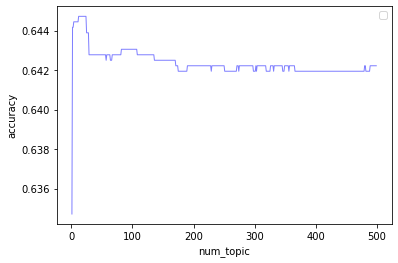

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x_axis_data = range(1,500) #x
y_axis_data = acc #y

plt.plot(x_axis_data, y_axis_data, 'b-', alpha=0.5, linewidth=1)#'bo-'表示蓝色实线，数据点实心原点标注
## plot中参数的含义分别是横轴值，纵轴值，线的形状（'s'方块,'o'实心圆点，'*'五角星   ...，颜色，透明度,线的宽度和标签 ，

plt.legend()  #显示上面的label
plt.xlabel('num_topic') #x_label
plt.ylabel('accuracy')#y_label
 
#plt.ylim(-1,1)#仅设置y轴坐标范围
plt.savefig('lightGBM.pdf',dpi=300)
plt.show()


The accuracy on train: 0.8440972222222223
The accuracy on test: 0.6488888888888888
The confusion matrix result:
 [[1303  716]
 [ 548 1033]]


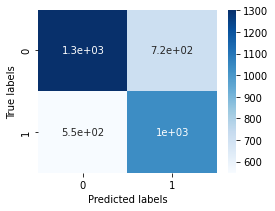

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy on train:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy on test:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()